# <center> Decision Tree Assignment1</center>

#### Problem Statement:
<code style="background:lightblue;color:black">A cloth manufacturing company is interested to know about the segment or attributes causes high sale.Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.</code>

In [1]:
#Importing the necessary libraries for the model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the csv file and having a glance at the data
cloth_data=pd.read_csv("Company_Data.csv")
cloth_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


#### Making necessary EDA for the model

In [3]:
#Checking the Statistical report of the data
cloth_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
#Checking for the datatypes and null values if present any
cloth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


### Checking duplicate value

In [5]:
#Checking if there are any duplicate values present
cloth_data[cloth_data.duplicated(keep = False)]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [6]:
#Finding the average of sales and considering all segments above that average value as fast moving products
cloth_data["sales"]=(cloth_data["Sales"]>7.49)*1

In [7]:
#Label Encoding the data
label_encoder = preprocessing.LabelEncoder()
cloth_data['ShelveLoc']= label_encoder.fit_transform(cloth_data['ShelveLoc']) 
cloth_data['Urban']= label_encoder.fit_transform(cloth_data['Urban']) 
cloth_data['US']= label_encoder.fit_transform(cloth_data['US']) 

In [8]:
#Looking into encoded data
cloth_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [9]:
#Dropping the sales column
cloth_data.drop(["Sales"],axis=1,inplace=True)

In [10]:
#Assigning the dependent and independent values
x=cloth_data.iloc[:,0:10]
y=cloth_data.iloc[:,10]

In [11]:
#Spliting the data into train and test model were test data is of 20%
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=20)

#### Building the Decision Tree Classifier Model

In [12]:
#Building Decsion tree model and fitting the data
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

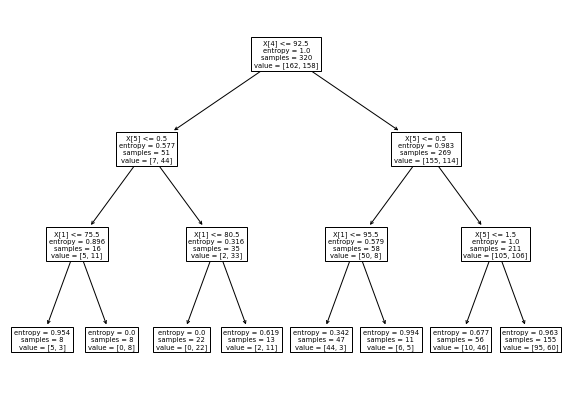

In [13]:
#Plotting the decision tree
plt.figure(figsize=(10,7))
tree.plot_tree(model);

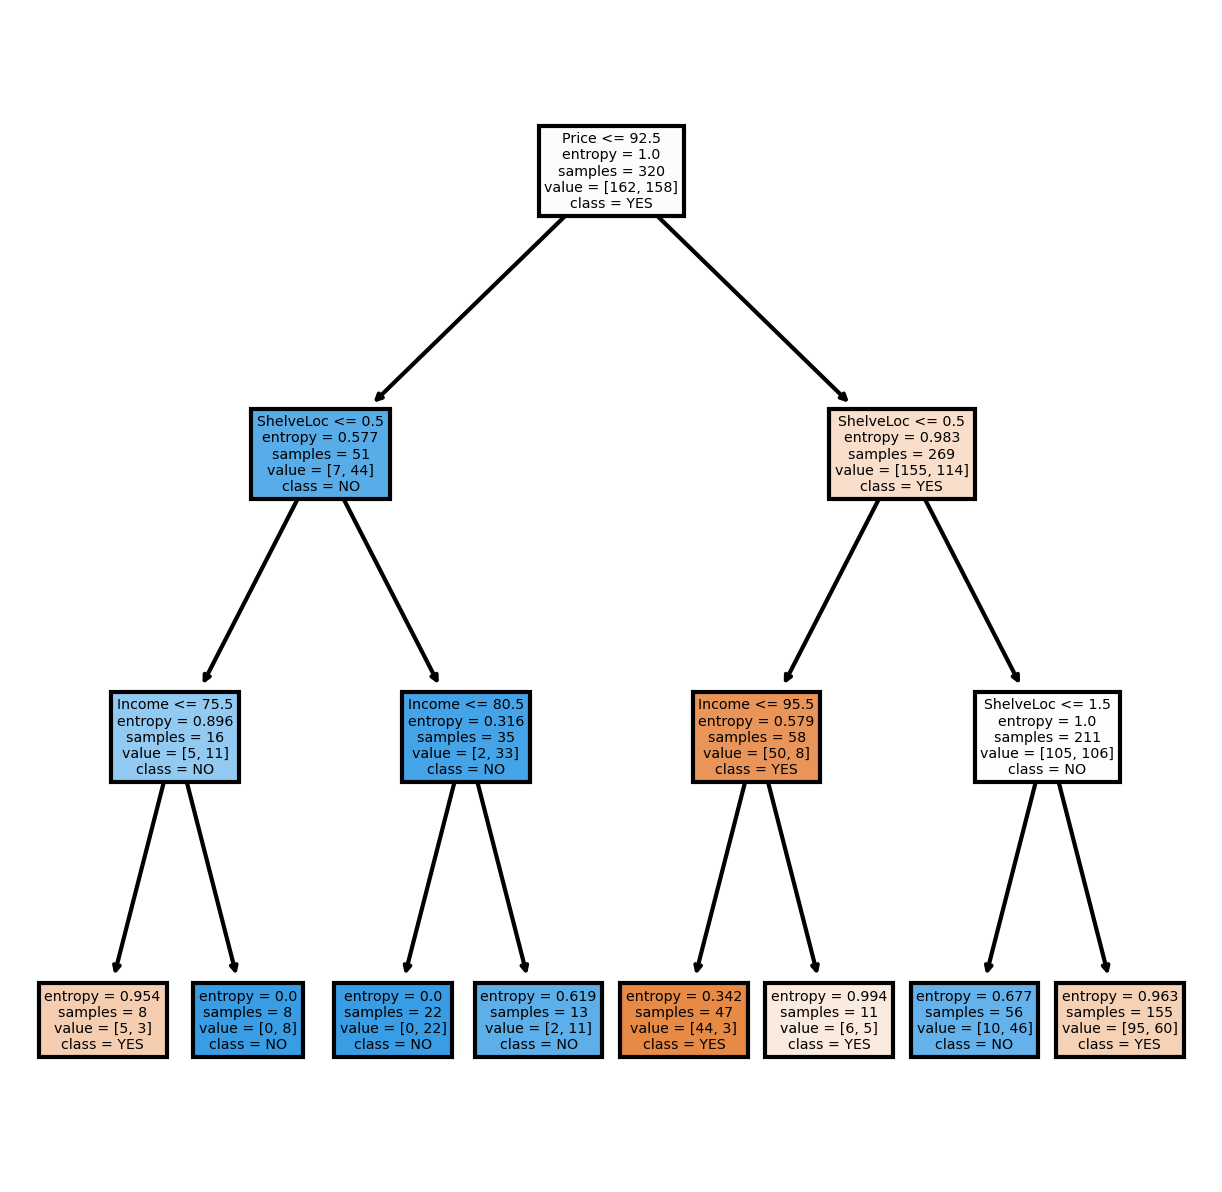

In [14]:
#Visualizing how the data is choosing the root node and how a decision tree classifier is built
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US','income']
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [15]:
#Checking the score for the training data
model.score(x_train, y_train)

0.740625

In [16]:
#Predicting on the test data using the built Decision tree classifier model
preds = model.predict(x_test)

In [17]:
#Checking the score of the test data
model.score(x_test, y_test)

0.6875

In [18]:
#Checking the accuracy score of the test data
y_pred = preds
('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))

('Accuracy Score:', 0.6875)

In [19]:
#Printing the Classification report using the Y_test data and the predicted data
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.62      0.92      0.74        39
           1       0.86      0.46      0.60        41

    accuracy                           0.69        80
   macro avg       0.74      0.69      0.67        80
weighted avg       0.75      0.69      0.67        80



In [20]:
#Running a loop of max_depth from 1 to 11 with the test and train accuracies
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = DecisionTreeClassifier(criterion='entropy', max_depth= max_depth, random_state= 40)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [21]:
#Listing the accuracies
accuracies = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})
accuracies

,max_depth,train_acc,test_acc
0,1,0.621875,0.6000
1,2,0.625000,0.6750
2,3,0.740625,0.6875
3,4,0.768750,0.7375
4,5,0.871875,0.7750
5,6,0.887500,0.7875
6,7,0.906250,0.7250
7,8,0.943750,0.7500
8,9,0.962500,0.8125
9,10,0.978125,0.7750


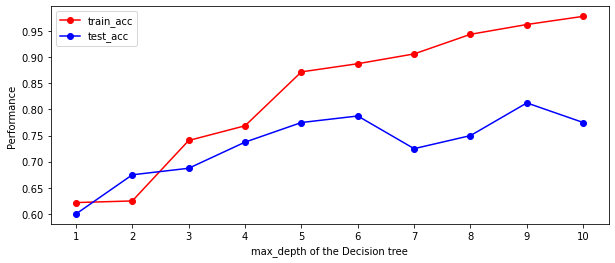

In [22]:
#Visualizing the accuracy graph, based on the max_depth
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot()

plt.plot(accuracies['max_depth'],accuracies['train_acc'], marker = 'o',color='red')
plt.plot(accuracies['max_depth'], accuracies['test_acc'], marker = 'o',color='blue')
ax.set_xticks(np.arange(1,11))

plt.legend(labels)
plt.xlabel('max_depth of the Decision tree')
plt.ylabel('Performance')
plt.show()

#### Insights Drawn:
>When the maximum depth of the decision tree is 9, the accuracy of the classsification algorithm gives 81.25%.Hence,it is clear that the Decision tree classfier gives a good result for the salary data.